<a href="https://colab.research.google.com/github/jimitpatel/AIML/blob/master/Project_8_Neural_Network_Project_%5BJimit_Patel%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 8 - Neural Network Project [Jimit Patel]

## The problem description

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of corpus of such street level photographs is Google's Street View imagery comprised of hundreds of millions of geo-located 360 degree panaromic images. The ability to automatically transcribe an address number from geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of large range of fonts, colours, styles and orientations and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, secularities and occlusions as well as by image acquistion factors such as resolution, motion and focus blurs.

In this project we will use dataset with images centered around single digit (many of the images do contain some distractors at the sides). Although, we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

## Data Description

**The Street View House Numbers (SVHN) Dataset**

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Link to dataset:

https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

**Acknowledgement for the datasets**

Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

## Objective
The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goal of this project are as follows:

## Steps and Tasks

### 1. Load Dataset

Download `googledriveloaddata.py` (https://github.com/jimitpatel/AIML/blob/master/googledriveloaddata.py) and upload it when asked below from local disk

In [1]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving googledriveloaddata.py to googledriveloaddata.py


In [0]:
!pip install -U -q PyDrive
from googledriveloaddata import DatasetLoader

In [0]:
url = "https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=drivesdk"
dataloader = DatasetLoader(url)
dataloader.load_data("SVHN_single_grey1.h5")

## 2. Understand the basic Image Classification pipeline and the data driven approach (train/predict stages)

In [4]:
import h5py
import numpy as np

h5f = h5py.File("SVHN_single_grey1.h5", "r")
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [0]:
X_test = h5f['X_test'][:]
X_train = h5f['X_train'][:]
X_val = h5f['X_val'][:]

y_test = h5f['y_test'][:]
y_train = h5f['y_train'][:]
y_val = h5f['y_val'][:]

h5f.close()

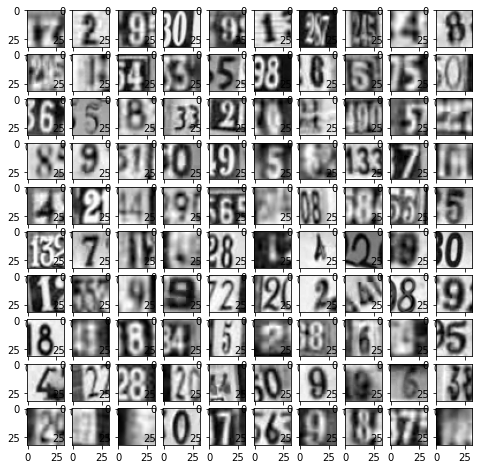

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
columns = 10
rows = 10
for i in range(1, columns*rows+1):
    img = X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img, cmap='gray')
plt.show()

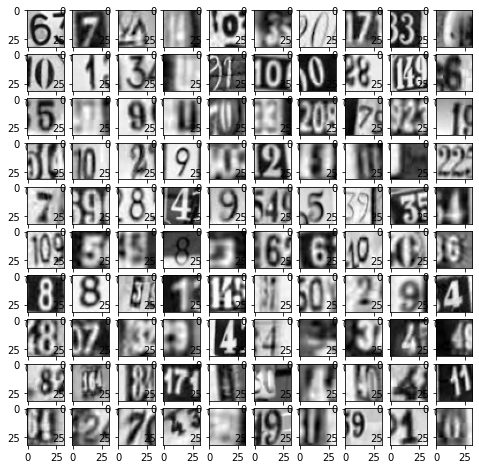

In [7]:
fig = plt.figure(figsize=(8,8))
for i in range(1, columns*rows+1):
    img = X_train[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img, cmap='gray')
plt.show()

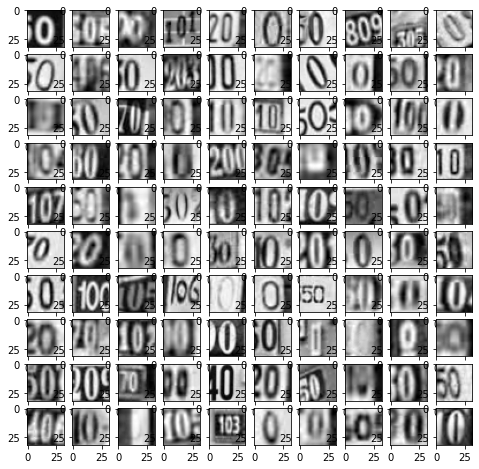

In [8]:
fig = plt.figure(figsize=(8,8))
for i in range(1, columns*rows+1):
    img = X_val[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img, cmap='gray')
plt.show()

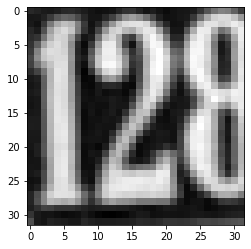

Label:  2


In [9]:
# show the number in the dataset from training data
plt.imshow(X_train[0],cmap='gray')
plt.show()
print('Label: ', y_train[0])

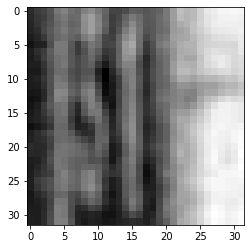

Label:  1


In [10]:
# show the number in the dataset from testing data
plt.imshow(X_test[0],cmap='gray')
plt.show()
print('Label: ', y_test[0])

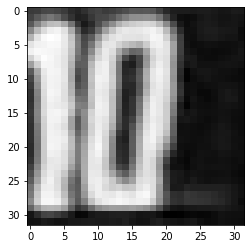

Label:  0


In [11]:
# show the number in the dataset from validation data
plt.imshow(X_val[0],cmap='gray')
plt.show()
print('Label: ', y_val[0])

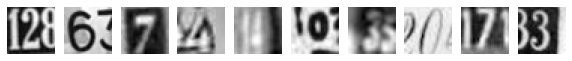

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [12]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

As given in description above, data contains numbers from 0 to 9. Few images are hard to read as we can see in above outputs.


---


## 3. Data fetching and understand the train/val/test splits

In [13]:
# Printing the shape and data type of training, testing, and validation data

total_images = X_train.shape[0] + X_val.shape[0] + X_test.shape[0]

print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Training data distribution : ", (X_train.shape[0]/total_images * 100), "%")

print("\nTesting data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Testing data distribution : ", (X_test.shape[0]/total_images * 100), "%")

print("\nValidation data X-- Shape :", X_val.shape, "and Data Type : ", X_val.dtype)
print("Validation data y-- Shape :", y_val.shape, "and Data Type : ", y_val.dtype)
print("Validation data distribution : ", (X_val.shape[0]/total_images * 100), "%")

print("\nMax pixel value : ", np.max(X_train))
print("Min pixel value : ", np.min(X_train))

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Training data distribution :  35.0 %

Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Testing data y-- Shape : (18000,) and Data Type :  uint8
Testing data distribution :  15.0 %

Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Validation data y-- Shape : (60000,) and Data Type :  uint8
Validation data distribution :  50.0 %

Max pixel value :  254.9745
Min pixel value :  0.0


Out of total 120,000 images, training consists of 42,000 (35%), validation consists of 60,000 (50%) and testing consists of 18,000 (15%) images. All images are of 32 x 32 resolution with just 1 channel

In [14]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4186, 4172, 4197, 4281, 4188, 4232, 4168, 4192, 4188, 4196]))

In [15]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1814, 1828, 1803, 1719, 1812, 1768, 1832, 1808, 1812, 1804]))

In [16]:
np.unique(y_val, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In all train, validation and test data. classified labels are almost equally distributed.


---

## 4. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activation)

In [0]:
class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None

    def forward(self, X, mode):
        self.X = X
        self.output = np.dot(X, self.W) + self.b
        return self.output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

In [0]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X, mode):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

In [0]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [0]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y])
        loss = cross_entropy[0] / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

In [0]:
class NN():
    def __init__(self, lossfunc=CrossEntropy()):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X, mode='train'):
        for layer in self.layers:
            X = layer.forward(X, mode)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y, mode='train'):
        out = self.forward(X, mode)
        loss = self.loss_func.forward(out,y)
        nextgrad = self.loss_func.backward(out,y)
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X, mode='train'):
        X = self.forward(X)
        return np.argmax(X, axis=1)
    
    def predict_scores(self, X, mode='train'):
        X = self.forward(X, mode)
        return X
    
    def clear_grad_param(self):
        self.grads = []

In [0]:
def update_params(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = mu * v[i] + learning_rate * g[i]
            p[i] -= v[i]

In [0]:
# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
        
    return minibatches

In [0]:
from datetime import datetime

def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9, X_val=None, y_val=None):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)

    
    for i in range(epoch):
        start_time = datetime.now()
        print("Epoch = ", (i + 1), "/", epoch)
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini, 'train')
            loss_batch.append(loss)
            update_params(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini, 'test')
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = np.array([], dtype="int64")
        y_val_pred = np.array([], dtype="int64")
        y_train1 = []
        y_vall = []
        for i in range(0, m_train, minibatch_size):
            X_tr = X_train[i:i + minibatch_size, : ]
            y_tr = y_train[i:i + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr, 'train'))

        for i in range(0, m_val, minibatch_size):
            X_va = X_val[i:i + minibatch_size, : ]
            y_va = y_val[i:i + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va, 'test'))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)

        mean_train_loss = sum(loss_batch) / float(len(loss_batch))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        stop_time = datetime.now()
        print("Loss = {0} | Training Accuracy = {1} | Val Loss = {2} | Val Accuracy = {3} | Time = {4}".format(mean_train_loss, train_acc, mean_val_loss, val_acc, (stop_time - start_time)))
    return net

In [0]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)

## 5. Implement batch normalization for training neural network

In [0]:
class BatchNormalization():
    def __init__(self, gamma = 1, beta = 0, eps = 1e-5, momentum = 0.9):
        self.gamma = gamma
        self.beta = beta
        self.eps = eps
        self.momentum = momentum
        self.running_mean = np.empty(0)
        self.running_var = np.empty(0)
        self.params = [self.gamma, self.beta, self.eps, self.momentum, self.running_mean, self.running_var]
        self.gradInput = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, X, mode):
        N, D = X.shape

        if not(self.running_mean.any()):
          self.running_mean = np.zeros(D, dtype=X.dtype)
        if not(self.running_var.any()):
          self.running_var = np.zeros(D, dtype=X.dtype)

        if mode == 'train':
          sample_mean = X.mean(axis = 0)
          sample_var = X.var(axis = 0)

          self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * sample_mean
          self.running_var = self.momentum * self.running_var + (1 - self.momentum) * sample_var

          self.std = np.sqrt(sample_var + self.eps)
          self.X_centered = X - sample_mean
          self.X_norm = self.X_centered / self.std
          self.output = self.gamma * self.X_norm + self.beta
        else:
          self.X_norm = (X - self.running_mean) / np.sqrt(self.running_var + self.eps)
          self.output = self.gamma * self.X_norm + self.beta
        return self.output

    def backward(self, nextgrad):
        N = nextgrad.shape[0]
        self.dgamma = (nextgrad * self.X_norm).sum(axis = 0)
        self.dbeta = nextgrad.sum(axis = 0)

        dx_norm = nextgrad * self.gamma
        self.gradInput = 1/N/self.std * (N * dx_norm - dx_norm.sum(axis = 0) - self.X_norm * (dx_norm * self.X_norm).sum(axis=0))
        return self.gradInput, [self.dgamma, self.dbeta]

In [195]:
X_train_flat = X_train.reshape(X_train.shape[0], (X_train.shape[1] * X_train.shape[2]))
X_val_flat = X_val.reshape(X_val.shape[0], (X_val.shape[1] * X_val.shape[2]))
X_test_flat = X_test.reshape(X_test.shape[0], (X_test.shape[1] * X_test.shape[2]))

print("Train = ", X_train_flat.shape, ", Validation = ", X_val_flat.shape, ", Test = ", X_test_flat.shape)

Train =  (42000, 1024) , Validation =  (60000, 1024) , Test =  (18000, 1024)


In [0]:
# Normalizing values
max_value = X_train_flat.max() # max = 254.9745

X_train_flat = X_train_flat / max_value
X_val_flat = X_val_flat / max_value
X_test_flat = X_test_flat / max_value

In [197]:
## input size
input_dim = X_train_flat.shape[1]

## hyperparameters
learning_rate = 0.09
# hidden_nodes = 2048
hidden_nodes = 32

unique, counts = np.unique(y_val, return_counts=True)
output_nodes = np.count_nonzero(unique) + 1

## define neural net
nn = NN()
nn.add_layer(Linear(input_dim, hidden_nodes))
nn.add_layer(BatchNormalization())
nn.add_layer(ReLU())
nn.add_layer(Linear(hidden_nodes, output_nodes))

nn = train(nn, X_train_flat , y_train, minibatch_size=200, epoch=1, learning_rate=learning_rate, X_val=X_val_flat, y_val=y_val)

Epoch =  1 / 1
Loss = 0.007365399504158033 | Training Accuracy = 0.6577857142857143 | Val Loss = 0.013390718569830987 | Val Accuracy = 0.14556666666666668 | Time = 0:00:03.104556
